# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats


# Loading Unprocessed Dataset

In [3]:
file_path = 'dmt-dataset.csv'
dataset = pd.read_csv(file_path)
dataset

,Date,Location,Temperature (°C),Humidity (%),Rainfall (mm),Soil pH,Soil Moisture (%),Nitrate Level (mg/kg),Phosphorus Level (mg/kg),Potassium Level (mg/kg),Crop Type,Crop Yield (kg/ha),Fertilizer Used (kg/ha),Pesticides Used (kg/ha),Water Usage (L/ha)
0,02:25.0,Farm D,18.16,72.92,30.33,5.69,33.61,NaN,14.88,23.85,Wheat,3821.05,125.05,9.61,1657.96
1,02:25.0,Farm B,34.23,67.30,7.27,7.18,10.84,14.04,18.80,22.54,Soybeans,2590.99,109.80,NaN,1126.93
2,02:25.0,NaN,NaN,64.39,31.38,5.34,11.82,1.08,39.91,44.71,Soybeans,4559.66,182.73,7.83,NaN
3,02:25.0,NaN,21.72,36.04,31.68,6.47,29.64,38.97,19.85,28.24,Soybeans,4894.38,196.04,2.29,1924.05
4,02:25.0,Farm D,18.73,NaN,35.76,5.26,21.49,27.80,NaN,42.41,Corn,4065.06,NaN,6.45,1449.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,02:25.0,Farm D,15.08,46.00,22.17,5.31,13.93,NaN,38.67,9.12,Soybeans,2927.13,76.29,3.82,591.22
5246,02:25.0,Farm C,15.45,68.06,28.35,NaN,24.77,12.20,4.40,0.82,Corn,4852.52,180.85,6.87,1738.54
5247,02:25.0,Farm C,21.87,38.76,10.95,7.77,12.66,30.80,25.10,35.55,Corn,4290.81,102.68,NaN,318.38
5248,02:25.0,Farm D,17.06,37.69,22.36,NaN,17.00,10.26,NaN,42.60,Rice,3724.99,25.46,1.42,NaN


# Data pre-processing

In [4]:
missing_data = dataset.isnull().sum()
print("Missing data in each column:\n", missing_data[missing_data > 0])

Missing data in each column:
 Date                        536
Location                    528
Temperature (°C)            521
Humidity (%)                523
Rainfall (mm)               523
Soil pH                     521
Soil Moisture (%)           515
Nitrate Level (mg/kg)       522
Phosphorus Level (mg/kg)    521
Potassium Level (mg/kg)     533
Crop Type                   519
Crop Yield (kg/ha)          523
Fertilizer Used (kg/ha)     524
Pesticides Used (kg/ha)     529
Water Usage (L/ha)          524
dtype: int64


In [5]:
# Drop the 'Date' column
dataset= dataset.drop(columns=['Date'])

# Optional: Reset the index if needed
dataset.reset_index(drop=True, inplace=True)

# Display the DataFrame after dropping the column
print(dataset.head())


  Location  Temperature (°C)  Humidity (%)  Rainfall (mm)  Soil pH  \
0   Farm D             18.16         72.92          30.33     5.69   
1   Farm B             34.23         67.30           7.27     7.18   
2      NaN               NaN         64.39          31.38     5.34   
3      NaN             21.72         36.04          31.68     6.47   
4   Farm D             18.73           NaN          35.76     5.26   

   Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg)  \
0              33.61                    NaN                     14.88   
1              10.84                  14.04                     18.80   
2              11.82                   1.08                     39.91   
3              29.64                  38.97                     19.85   
4              21.49                  27.80                       NaN   

   Potassium Level (mg/kg) Crop Type  Crop Yield (kg/ha)  \
0                    23.85     Wheat             3821.05   
1                   

# Handling Numerical value

In [6]:
# Handle missing values in numerical columns by replacing with the mean
imputer = SimpleImputer(strategy='mean')

# Select only the numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer to the numeric columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Check dataset after handling missing values
print("Dataset after imputing missing values:\n", dataset)


Dataset after imputing missing values:
      Location  Temperature (°C)  Humidity (%)  Rainfall (mm)   Soil pH  \
0      Farm D         18.160000     72.920000          30.33  5.690000   
1      Farm B         34.230000     67.300000           7.27  7.180000   
2         NaN         24.966674     64.390000          31.38  5.340000   
3         NaN         21.720000     36.040000          31.68  6.470000   
4      Farm D         18.730000     60.264493          35.76  5.260000   
...       ...               ...           ...            ...       ...   
5245   Farm D         15.080000     46.000000          22.17  5.310000   
5246   Farm C         15.450000     68.060000          28.35  6.513271   
5247   Farm C         21.870000     38.760000          10.95  7.770000   
5248   Farm D         17.060000     37.690000          22.36  6.513271   
5249   Farm C         24.966674     58.210000          22.44  6.010000   

      Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg

In [7]:
missing_data = dataset.isnull().sum()
print("Missing data in each column:\n", missing_data[missing_data > 0])

Missing data in each column:
 Location     528
Crop Type    519
dtype: int64


# Handling Categorical Value

In [8]:
unique_locations = dataset['Location'].unique()
print("Unique values in the Location column:", unique_locations)

Unique values in the Location column: ['Farm D' 'Farm B' nan 'Farm A' 'Farm C']


In [9]:
most_frequent_location = dataset['Location'].mode()
print("Most frequent value(s) in the Location column:", most_frequent_location)


Most frequent value(s) in the Location column: 0    Farm A
Name: Location, dtype: object


In [10]:
from sklearn.impute import SimpleImputer

categorical_columns = ['Location', 'Crop Type'] 

# Remove leading/trailing spaces from categorical values
dataset[categorical_columns] = dataset[categorical_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Create an imputer for categorical columns using the most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
dataset[categorical_columns] = categorical_imputer.fit_transform(dataset[categorical_columns])

# Check the most frequent value in the Location column
most_frequent_location = dataset['Location'].mode()[0]
print("Most frequent value in the Location column:", most_frequent_location)

# Check the dataset after handling missing values in categorical columns
print("Dataset after handling missing categorical values:\n", dataset.head())


Most frequent value in the Location column: Farm A
Dataset after handling missing categorical values:
   Location  Temperature (°C)  Humidity (%)  Rainfall (mm)  Soil pH  \
0   Farm D         18.160000     72.920000          30.33     5.69   
1   Farm B         34.230000     67.300000           7.27     7.18   
2   Farm A         24.966674     64.390000          31.38     5.34   
3   Farm A         21.720000     36.040000          31.68     6.47   
4   Farm D         18.730000     60.264493          35.76     5.26   

   Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg)  \
0              33.61              25.068352                 14.880000   
1              10.84              14.040000                 18.800000   
2              11.82               1.080000                 39.910000   
3              29.64              38.970000                 19.850000   
4              21.49              27.800000                 20.033546   

   Potassium Level (mg/kg) Crop Type 

In [11]:
most_frequent_location = dataset['Crop Type'].mode()
print("Most frequent value(s) in the Location column:", most_frequent_location)


Most frequent value(s) in the Location column: 0    Corn
Name: Crop Type, dtype: object


In [12]:

# Check the most frequent value in the Crop Type column
most_frequent_crop_type = dataset['Crop Type'].mode()[0]
print("Most frequent value in the Crop Type column:", most_frequent_crop_type)

# Remove leading/trailing spaces from the Crop Type values
dataset['Crop Type'] = dataset['Crop Type'].str.strip()

# Fill missing values in the Crop Type column with the most frequent value
dataset['Crop Type'].fillna(most_frequent_crop_type, inplace=True)

# Check the dataset after handling missing values in Crop Type
# Display the first few rows of the dataset with the Crop Type column
print("Dataset after handling missing values in Crop Type:\n", dataset[['Crop Type']].head(10))



Most frequent value in the Crop Type column: Corn
Dataset after handling missing values in Crop Type:
   Crop Type
0     Wheat
1  Soybeans
2  Soybeans
3  Soybeans
4      Corn
5      Rice
6      Corn
7      Rice
8      Corn
9      Corn


In [13]:
print("Dataset after handling missing values:\n", dataset[['Location', 'Crop Type']].head(20))


Dataset after handling missing values:
    Location Crop Type
0    Farm D     Wheat
1    Farm B  Soybeans
2    Farm A  Soybeans
3    Farm A  Soybeans
4    Farm D      Corn
5    Farm A      Rice
6    Farm D      Corn
7    Farm A      Rice
8    Farm A      Corn
9    Farm A      Corn
10   Farm A      Corn
11   Farm A  Soybeans
12   Farm A      Corn
13   Farm C      Corn
14   Farm B      Corn
15   Farm B      Corn
16   Farm C      Corn
17   Farm B     Wheat
18   Farm C  Soybeans
19   Farm A      Corn


In [14]:
# Encode categorical columns (e.g., Location and Crop Type) using Label Encoding
label_encoder = LabelEncoder()

# Encode 'Location' column
dataset['Location'] = label_encoder.fit_transform(dataset['Location'])

# Encode 'Crop Type' column
dataset['Crop Type'] = label_encoder.fit_transform(dataset['Crop Type'])

# Check the dataset after encoding
# Print the first 5 rows of specified columns
print(dataset[['Location', 'Crop Type']].head(10))



   Location  Crop Type
0         3          3
1         1          2
2         0          2
3         0          2
4         3          0
5         0          1
6         3          0
7         0          1
8         0          0
9         0          0


# Correlation Analysis

In [15]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Extract the correlation values for the target variable 'Crop Yield (kg/ha)'
correlation_with_target = correlation_matrix['Crop Yield (kg/ha)']

# Display the correlations
print(correlation_with_target)


Location                    0.020066
Temperature (°C)            0.003455
Humidity (%)               -0.002830
Rainfall (mm)              -0.010250
Soil pH                    -0.018207
Soil Moisture (%)           0.010607
Nitrate Level (mg/kg)      -0.036605
Phosphorus Level (mg/kg)    0.009944
Potassium Level (mg/kg)     0.022093
Crop Type                   0.009158
Crop Yield (kg/ha)          1.000000
Fertilizer Used (kg/ha)     0.003939
Pesticides Used (kg/ha)    -0.002125
Water Usage (L/ha)         -0.000871
Name: Crop Yield (kg/ha), dtype: float64


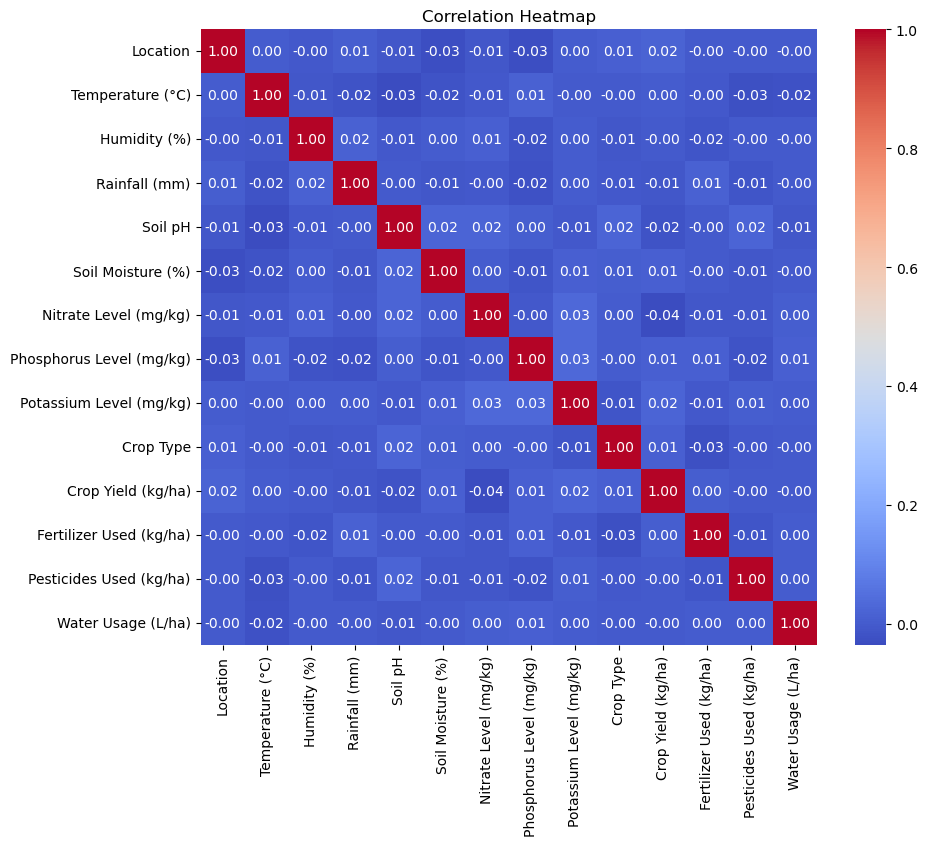

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


# Data Visualization

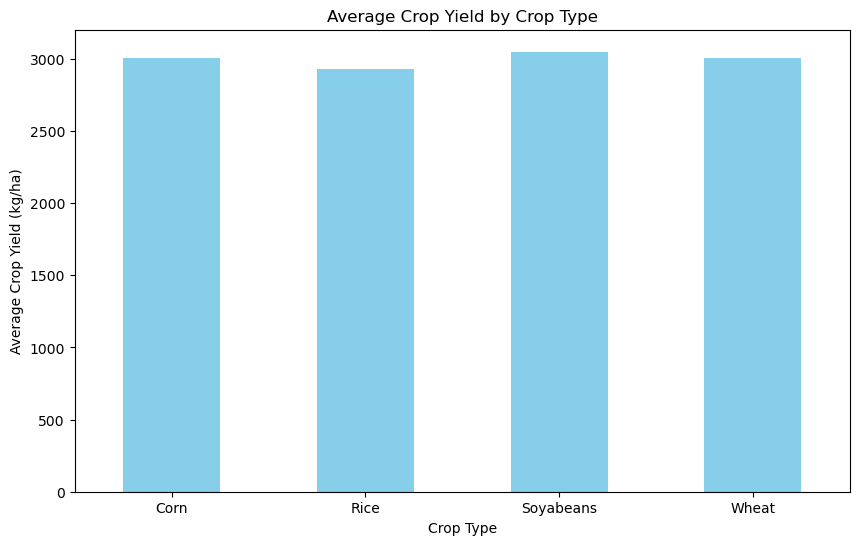

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'dataset' where 'Crop Type' is encoded as 0, 1, 2, 3.
# Create a temporary copy of the 'Crop Type' column with mapped values
crop_mapping = {0: 'Corn', 1: 'Rice', 2: 'Soyabeans', 3: 'Wheat'}

# Create a copy of the dataset to avoid modifying the original one
temp_dataset = dataset.copy()
temp_dataset['Crop Type'] = temp_dataset['Crop Type'].map(crop_mapping)

# Create the plot with the updated Crop Type labels from the copy
plt.figure(figsize=(10, 6))
temp_dataset.groupby('Crop Type')['Crop Yield (kg/ha)'].mean().plot(kind='bar', color='skyblue')

plt.title('Average Crop Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.xticks(rotation=0)  # Keep the crop type labels horizontal
plt.show()


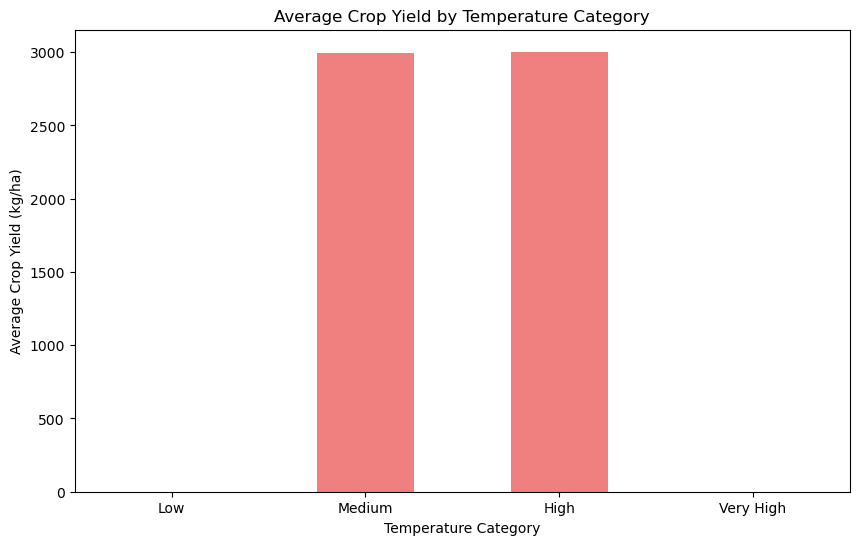

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define temperature bins (e.g., Low, Medium, High) - you can adjust the bin edges based on your data distribution
bins = [0, 15, 25, 35, 50]  # Adjust the temperature range based on your data
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a temporary copy of the dataset to avoid modifying the original one
temp_dataset = dataset.copy()

# Create a new column for Temperature Category based on the bins in the copy
temp_dataset['Temperature Category'] = pd.cut(temp_dataset['Temperature (°C)'], bins=bins, labels=labels, include_lowest=True)

# Group by Temperature Category and calculate the average crop yield
avg_yield_by_temp = temp_dataset.groupby('Temperature Category')['Crop Yield (kg/ha)'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_yield_by_temp.plot(kind='bar', color='lightcoral')

plt.title('Average Crop Yield by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.xticks(rotation=0)  # Keep the temperature labels horizontal
plt.show()


# Defining Feature X and Target Y

In [19]:
dataset_encoded = pd.get_dummies(dataset, columns=['Location', 'Crop Type'], drop_first=True)
# Drop the 'Date' column and the target 'Crop Yield (kg/ha)' 
X = dataset.drop(['Crop Yield (kg/ha)'], axis=1) 
y = dataset['Crop Yield (kg/ha)'] 
# Display the feature and target data 
print("Features (X):\n", X.head()) 
print("Target (y):\n", y.head()) 


Features (X):
    Location  Temperature (°C)  Humidity (%)  Rainfall (mm)  Soil pH  \
0         3         18.160000     72.920000          30.33     5.69   
1         1         34.230000     67.300000           7.27     7.18   
2         0         24.966674     64.390000          31.38     5.34   
3         0         21.720000     36.040000          31.68     6.47   
4         3         18.730000     60.264493          35.76     5.26   

   Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg)  \
0              33.61              25.068352                 14.880000   
1              10.84              14.040000                 18.800000   
2              11.82               1.080000                 39.910000   
3              29.64              38.970000                 19.850000   
4              21.49              27.800000                 20.033546   

   Potassium Level (mg/kg)  Crop Type  Fertilizer Used (kg/ha)  \
0                    23.85          3               1

# Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the feature set X and transform it
X_scaled = scaler.fit_transform(X)

# Optionally, convert X_scaled back to a DataFrame with the original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled feature set
print("Scaled Features (X):\n", X_scaled.head())


Scaled Features (X):
    Location  Temperature (°C)  Humidity (%)  Rainfall (mm)   Soil pH  \
0  1.434074         -1.231114  7.732073e-01       0.430927 -1.005983   
1 -0.292537          1.675446  4.298449e-01      -1.263739  0.814699   
2 -1.155843          0.000000  2.520541e-01       0.508091 -1.433660   
3 -1.155843         -0.587222 -1.480032e+00       0.530138 -0.052875   
4  1.434074         -1.128019 -4.341168e-16       0.829975 -1.531415   

   Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg)  \
0           1.036330           5.165421e-16             -4.734607e-01   
1          -1.729245          -8.017264e-01             -1.133269e-01   
2          -1.610217          -1.743878e+00              1.826067e+00   
3           0.554146           1.010606e+00             -1.686255e-02   
4          -0.435728           1.985822e-01              3.263908e-16   

   Potassium Level (mg/kg)  Crop Type  Fertilizer Used (kg/ha)  \
0                -0.093019   1.440618   

# Feature Engineering

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

# Step 1: Polynomial Features
# Adding polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Optionally convert back to DataFrame for better readability
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Display polynomial features
print("Polynomial Features (degree=2):\n", X_poly.head())

# Step 2: Feature Selection
# Select the top 10 features based on f_regression score
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_poly, y)

# Get the selected feature names
selected_features = np.array(X_poly.columns)[selector.get_support()]
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Display the selected features
print("Selected Top 10 Features:\n", X_selected.head())

# Step 3: Log Transformation (if needed)
# Apply log transformation to specific columns with skewness
# Example: Let's apply it to columns you know are skewed (adjust column names as needed)
# X_selected['some_feature_log'] = np.log1p(X_selected['some_feature'])

# Display the dataset after feature engineering
print("Feature-Engineered Dataset:\n", X_selected.head())


Polynomial Features (degree=2):
    Location  Temperature (°C)  Humidity (%)  Rainfall (mm)   Soil pH  \
0  1.434074         -1.231114  7.732073e-01       0.430927 -1.005983   
1 -0.292537          1.675446  4.298449e-01      -1.263739  0.814699   
2 -1.155843          0.000000  2.520541e-01       0.508091 -1.433660   
3 -1.155843         -0.587222 -1.480032e+00       0.530138 -0.052875   
4  1.434074         -1.128019 -4.341168e-16       0.829975 -1.531415   

   Soil Moisture (%)  Nitrate Level (mg/kg)  Phosphorus Level (mg/kg)  \
0           1.036330           5.165421e-16             -4.734607e-01   
1          -1.729245          -8.017264e-01             -1.133269e-01   
2          -1.610217          -1.743878e+00              1.826067e+00   
3           0.554146           1.010606e+00             -1.686255e-02   
4          -0.435728           1.985822e-01              3.263908e-16   

   Potassium Level (mg/kg)  Crop Type  ...  Crop Type^2  \
0                -0.093019   1.44061

# Splitting Dataset

In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4200, 13)
X_test shape: (1050, 13)
y_train shape: (4200,)
y_test shape: (1050,)


In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search_rf.fit(X_train, y_train)

# print("Best parameters for Random Forest:", grid_search_rf.best_params_)


# Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------------ Random Forest Regressor ------------------------
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest performance
t = 0.50 
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Accuracy (R-squared):", rf_r2)
 
accuracy = np.mean(np.abs((y_test - y_pred_rf) / y_test) <= t) * 100

print(f"Accuracy : {accuracy:.2f}%")



print("\n")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 889.7106702022829
Mean Squared Error (MSE): 1188966.241244134
Accuracy (R-squared): 0.017537109006904306
Accuracy : 78.29%




# Gradient Boosting Regressor

In [25]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
t = 0.42  
# Evaluate Gradient Boosting performance
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print("Mean Absolute Error (MAE):", gb_mae)
print("Mean Squared Error (MSE):", gb_mse)
print("Accuracy (R-squared):", gb_r2)


accuracy = np.mean(np.abs((y_test - y_pred_rf) / y_test) <= t) * 100

print(f"Accuracy : {accuracy:.2f}%")



Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 914.572377121056
Mean Squared Error (MSE): 1225585.9128322771
Accuracy (R-squared): -0.012722344262398044
Accuracy : 73.71%


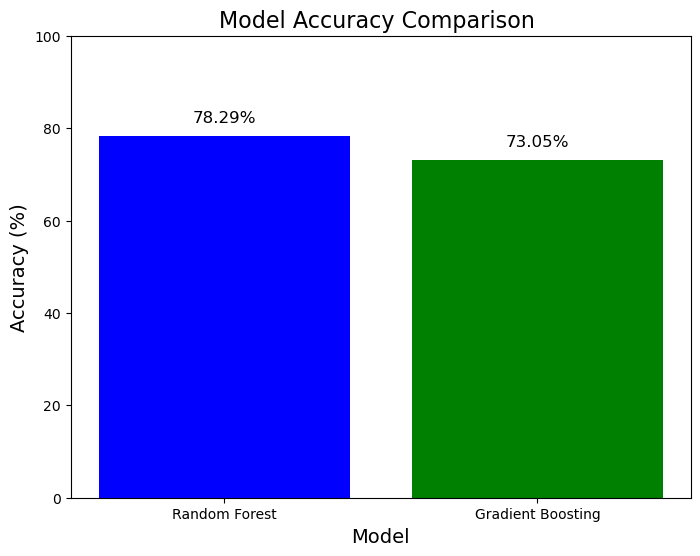

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Given predictions and true values for Random Forest and Gradient Boosting
trf = 0.50 
tgb = 0.42  

# Calculate accuracy for both models within tolerance range
accuracy_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test) <= trf) * 100
accuracy_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test) <= tgb) * 100

# Model names
models = ['Random Forest', 'Gradient Boosting']

# Accuracy values
accuracy_values = [accuracy_rf, accuracy_gb]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['blue', 'green'])
plt.title('Model Accuracy Comparison ', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim([0, 100])

# Displaying the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center', fontsize=12)

# Show plot
plt.show()
